<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/DemographicDataAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This was a challenge from Freecodecamp course Data Analysis using Python.The challenege included a dataset of demographic data that was extracted from the 1994 Census database. There were various questions that were asked to solve during the challenge and I have also done an analysis of the data and plotted various charts for better understanding of the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4


In [ ]:
demo = pd.read_csv('https://raw.githubusercontent.com/MaliniVibin1502/freecodecampprojects/main/adult.data.csv?token=GHSAT0AAAAAACF2DXWWLEXWOXTL4OD47DFKZH5KXAA')
demo.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
demo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
demo.shape


(32561, 15)

People of each race represented in the dataset, and plotting a bar chart of the values

In [ ]:
demo['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<Axes: >

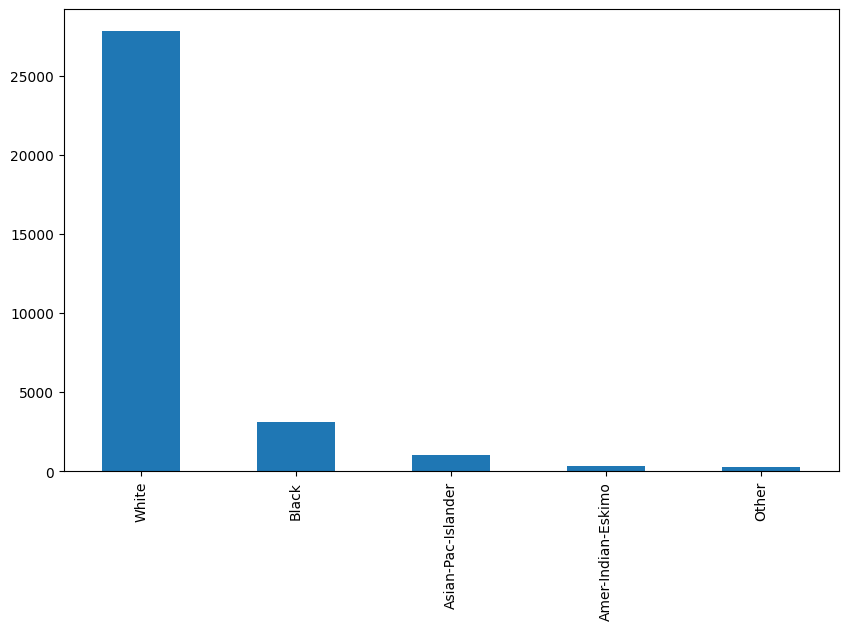

In [ ]:
demo['race'].value_counts().plot(kind='bar',figsize=(10,6))

People of different gender in dataset,plot a pie chart to understand the split

In [ ]:
demo['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

<Axes: ylabel='sex'>

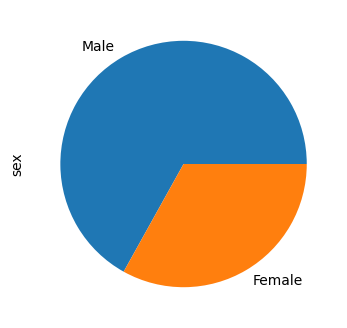

In [ ]:
demo['sex'].value_counts().plot(kind='pie',figsize=(4,4))

Average age of male and female

In [ ]:
avg_male= round(demo[demo['sex']=='Male']['age'].mean(),2)
avg_male


39.43

In [ ]:
avg_female=round(demo[demo['sex']== 'Female']['age'].mean(),2)
avg_female

36.86

List the number of people corresponding to their education in the dataset and plot a bar chart

In [ ]:
demo['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

<Axes: >

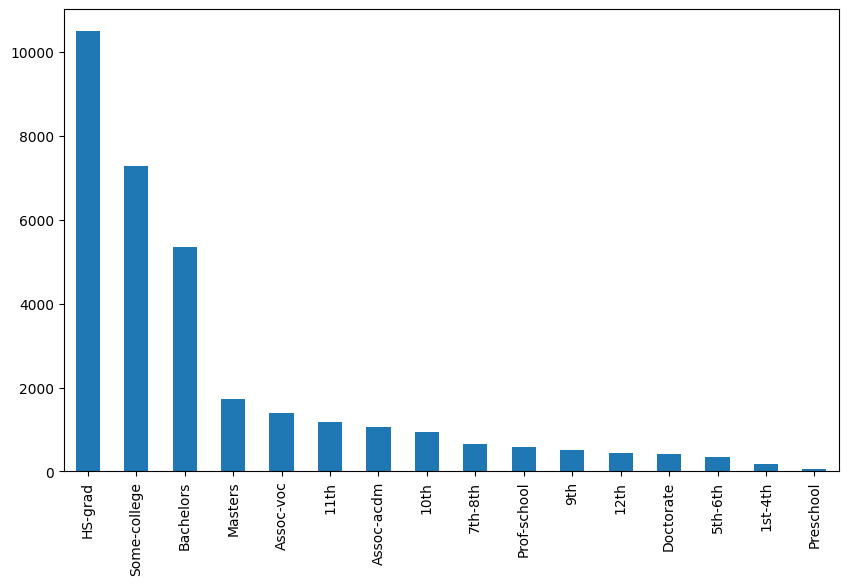

In [ ]:
demo['education'].value_counts().plot(kind = 'bar', figsize=(10,6))

Percentage of people who have Bachelors degree

In [ ]:
per_bachelor = round(demo[demo['education']== 'Bachelors'].shape[0]/demo.shape[0]*100,2)
per_bachelor

16.45

Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K

Percentage of people without advanced education make more than 50K

In [ ]:
high_ed= demo['education'].isin(['Bachelors','Masters','Doctorate'])
salary_high = demo['salary']=='>50K'
per_ad_moresalary= round((high_ed&salary_high).sum()/high_ed.sum()*100,2)
per_ad_moresalary


46.54

In [ ]:
per_noad_moresalary=round(((~high_ed)&salary_high).sum()/(~high_ed).sum()*100,2)
per_noad_moresalary

17.37

Minumum and Maximum number of hours worked in a week

In [ ]:

min_hours = demo['hours-per-week'].min()
min_hours

1

In [ ]:
max_hours = demo['hours-per-week'].max()
max_hours

99

Average hours worked by people in a week

In [ ]:
avg_hour= round(demo['hours-per-week'].mean(),2)
avg_hour

40.44

Percentage of people who work the minimum number of hours per week having a salary of >50K

In [ ]:
min_con = demo['hours-per-week'] == min_hours
per_min = round((min_con&salary_high).sum()/min_con.sum()*100,2)
per_min

10.0

Percentage of people who work the maximum number of hours per week having a salary less than 50K

In [ ]:
max_con=demo['hours-per-week']==max_hours
per_max=round((max_con&~salary_high).sum()/max_con.sum()*100,2)
per_max

70.59

Country with the highest and lowest percentage of people that earn >50K
Country with the highest and lowest percentage of people that earn <50K

In [ ]:
country=(demo[salary_high]['native-country'].value_counts()/demo['native-country'].value_counts() * 100).sort_values(ascending=False)
high_country=country.index[0]
high_country_per= country.iloc[0]
print(high_country,"=" ,round(high_country_per,2))


Iran = 41.86


In [ ]:
country_low = (demo[salary_high]['native-country'].value_counts()/demo['native-country'].value_counts() * 100).sort_values(ascending=True)
low_country = country_low.index[0]
low_country_per= country_low.iloc[0]
print(low_country,"=",round(low_country_per,2))

Dominican-Republic = 2.86


Top 10 Occupations in the dataset

In [ ]:
demo['occupation'].value_counts().head(10)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Name: occupation, dtype: int64

Most popular occupation in United States

In [ ]:
most_popular= demo[demo['native-country']== 'United-States']['occupation'].value_counts().index[0]
most_popular

'Exec-managerial'

Most popular occupation in India for those who earn >50K

In [ ]:
occ = demo[(demo['native-country'] == 'India')&salary_high]['occupation'].value_counts().index[0]
occ

'Prof-specialty'

Average age of people in United States

In [ ]:
uni = demo['native-country']=='United-States'
avg_age= round(demo[uni]['age'].shape[0]/demo.shape[0]*100,2)
avg_age

89.59

Gender split of each country in dataset

In [ ]:
split = demo.groupby(['native-country','sex'])
split.size().unstack()

sex,Female,Male
native-country,,
?,163.0,420.0
Cambodia,3.0,16.0
Canada,39.0,82.0
China,21.0,54.0
Columbia,24.0,35.0
Cuba,40.0,55.0
Dominican-Republic,35.0,35.0
Ecuador,9.0,19.0
El-Salvador,35.0,71.0


Analysing the Education and Gender in the dataset

<Axes: ylabel='education'>

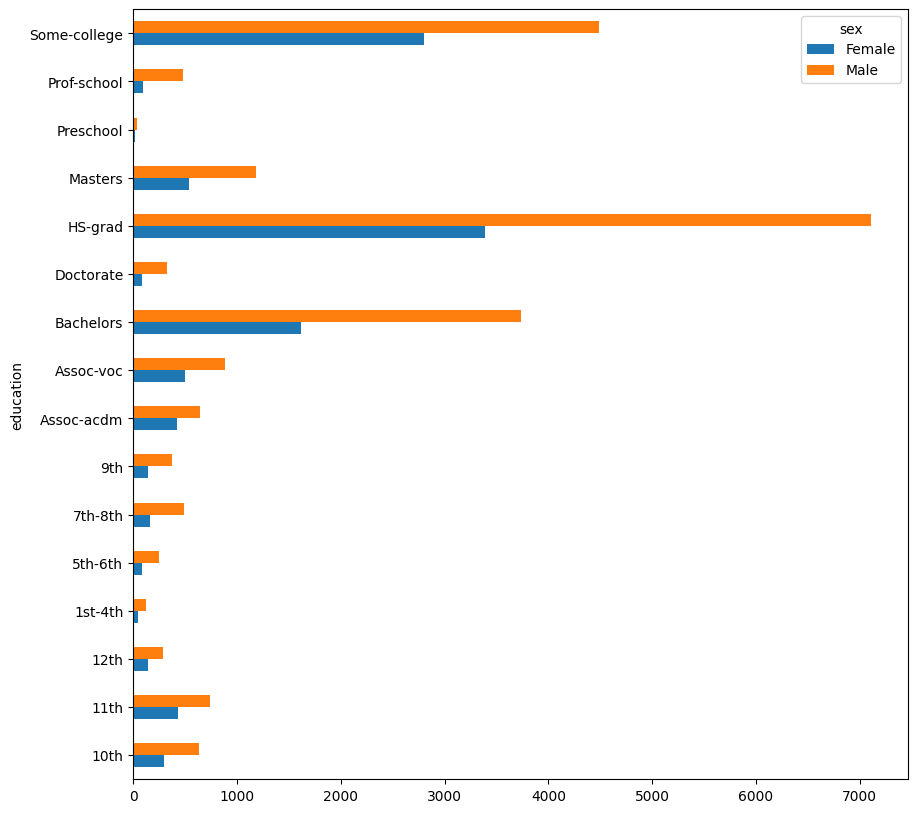

In [ ]:
ana1 = demo.groupby(['education','sex'])
ana1.size().unstack().plot(kind ='barh', figsize =(10,10))

Trying to understand the education bacground of people in each country

In [ ]:
demo.groupby(['native-country', 'education']).size().unstack()

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
native-country,,,,,,,,,,,,,,,,
?,12.0,8.0,16.0,5.0,15.0,19.0,8.0,12.0,16.0,145.0,23.0,133.0,49.0,1.0,17.0,104.0
Cambodia,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,3.0,NaN,7.0,NaN,1.0,NaN,5.0
Canada,2.0,5.0,2.0,NaN,1.0,2.0,3.0,1.0,7.0,24.0,8.0,31.0,8.0,NaN,2.0,25.0
China,3.0,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,21.0,9.0,18.0,11.0,2.0,1.0,4.0
Columbia,3.0,1.0,2.0,1.0,2.0,1.0,3.0,4.0,5.0,4.0,1.0,20.0,1.0,NaN,2.0,9.0
Cuba,2.0,1.0,3.0,3.0,4.0,6.0,3.0,3.0,2.0,17.0,2.0,24.0,5.0,NaN,3.0,17.0
Dominican-Republic,4.0,4.0,5.0,6.0,2.0,9.0,6.0,NaN,1.0,3.0,NaN,18.0,2.0,2.0,NaN,8.0
Ecuador,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,NaN,10.0,2.0,NaN,NaN,7.0
El-Salvador,4.0,5.0,2.0,10.0,19.0,4.0,10.0,3.0,NaN,5.0,1.0,21.0,3.0,4.0,1.0,14.0


<Axes: xlabel='occupation'>

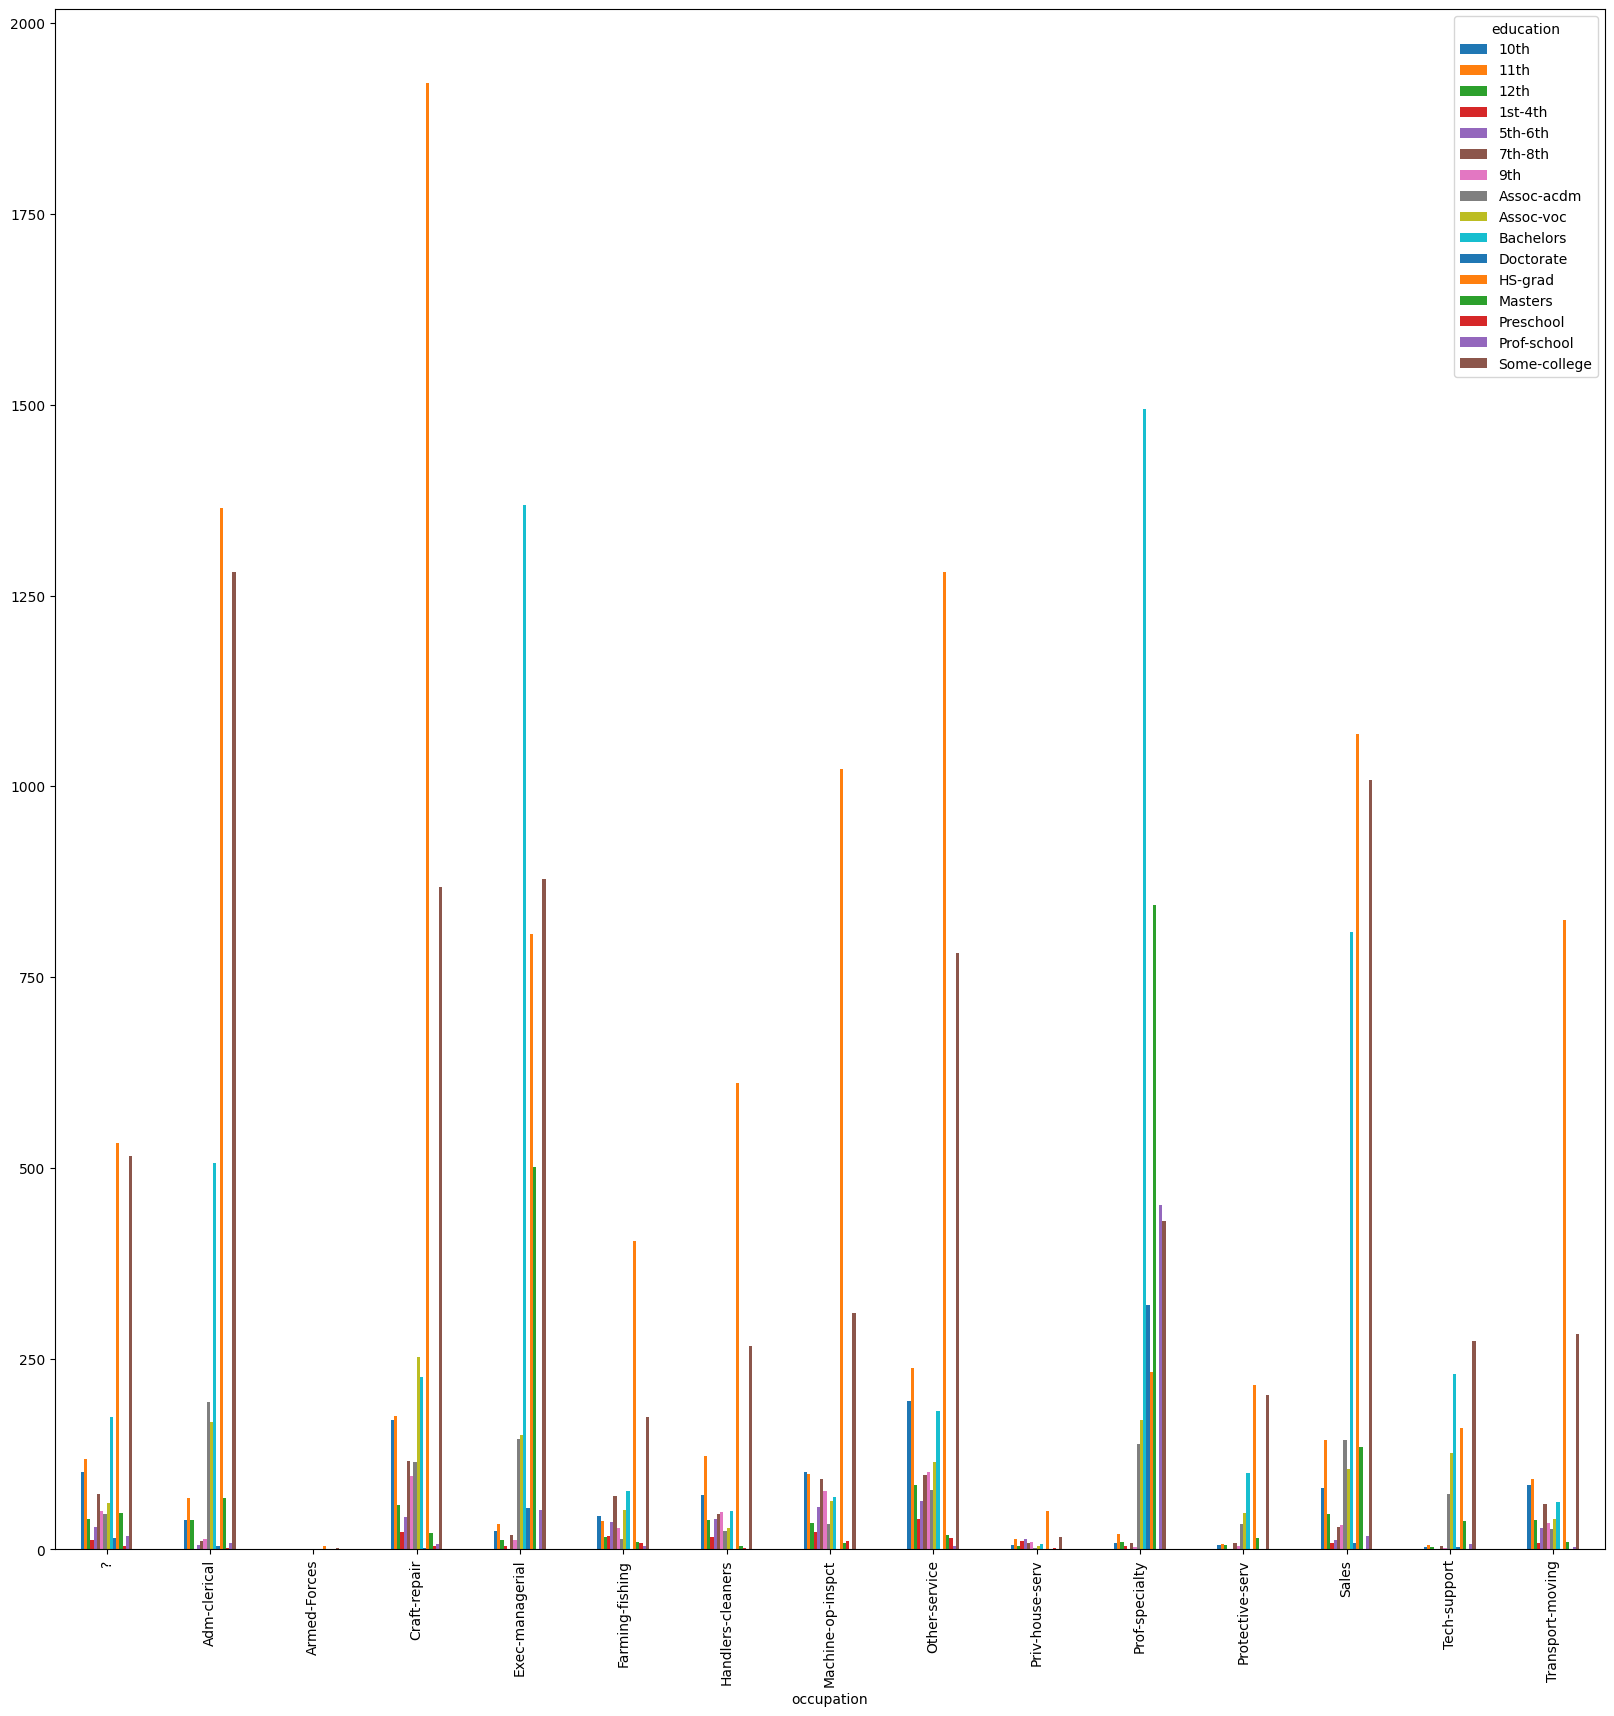

In [ ]:
demo.groupby(['occupation', 'education']).size().unstack().plot(kind="bar", figsize = (20,20))

More analysis of data

<Figure size 1000x1000 with 0 Axes>

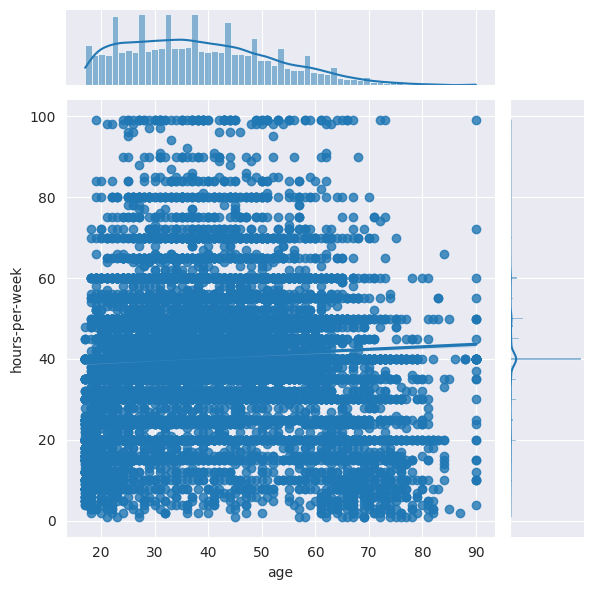

In [ ]:
sb.set_style('darkgrid')
plt.figure(figsize=(10,10))
sb.jointplot(x='age',y='hours-per-week', data=demo, kind='reg')

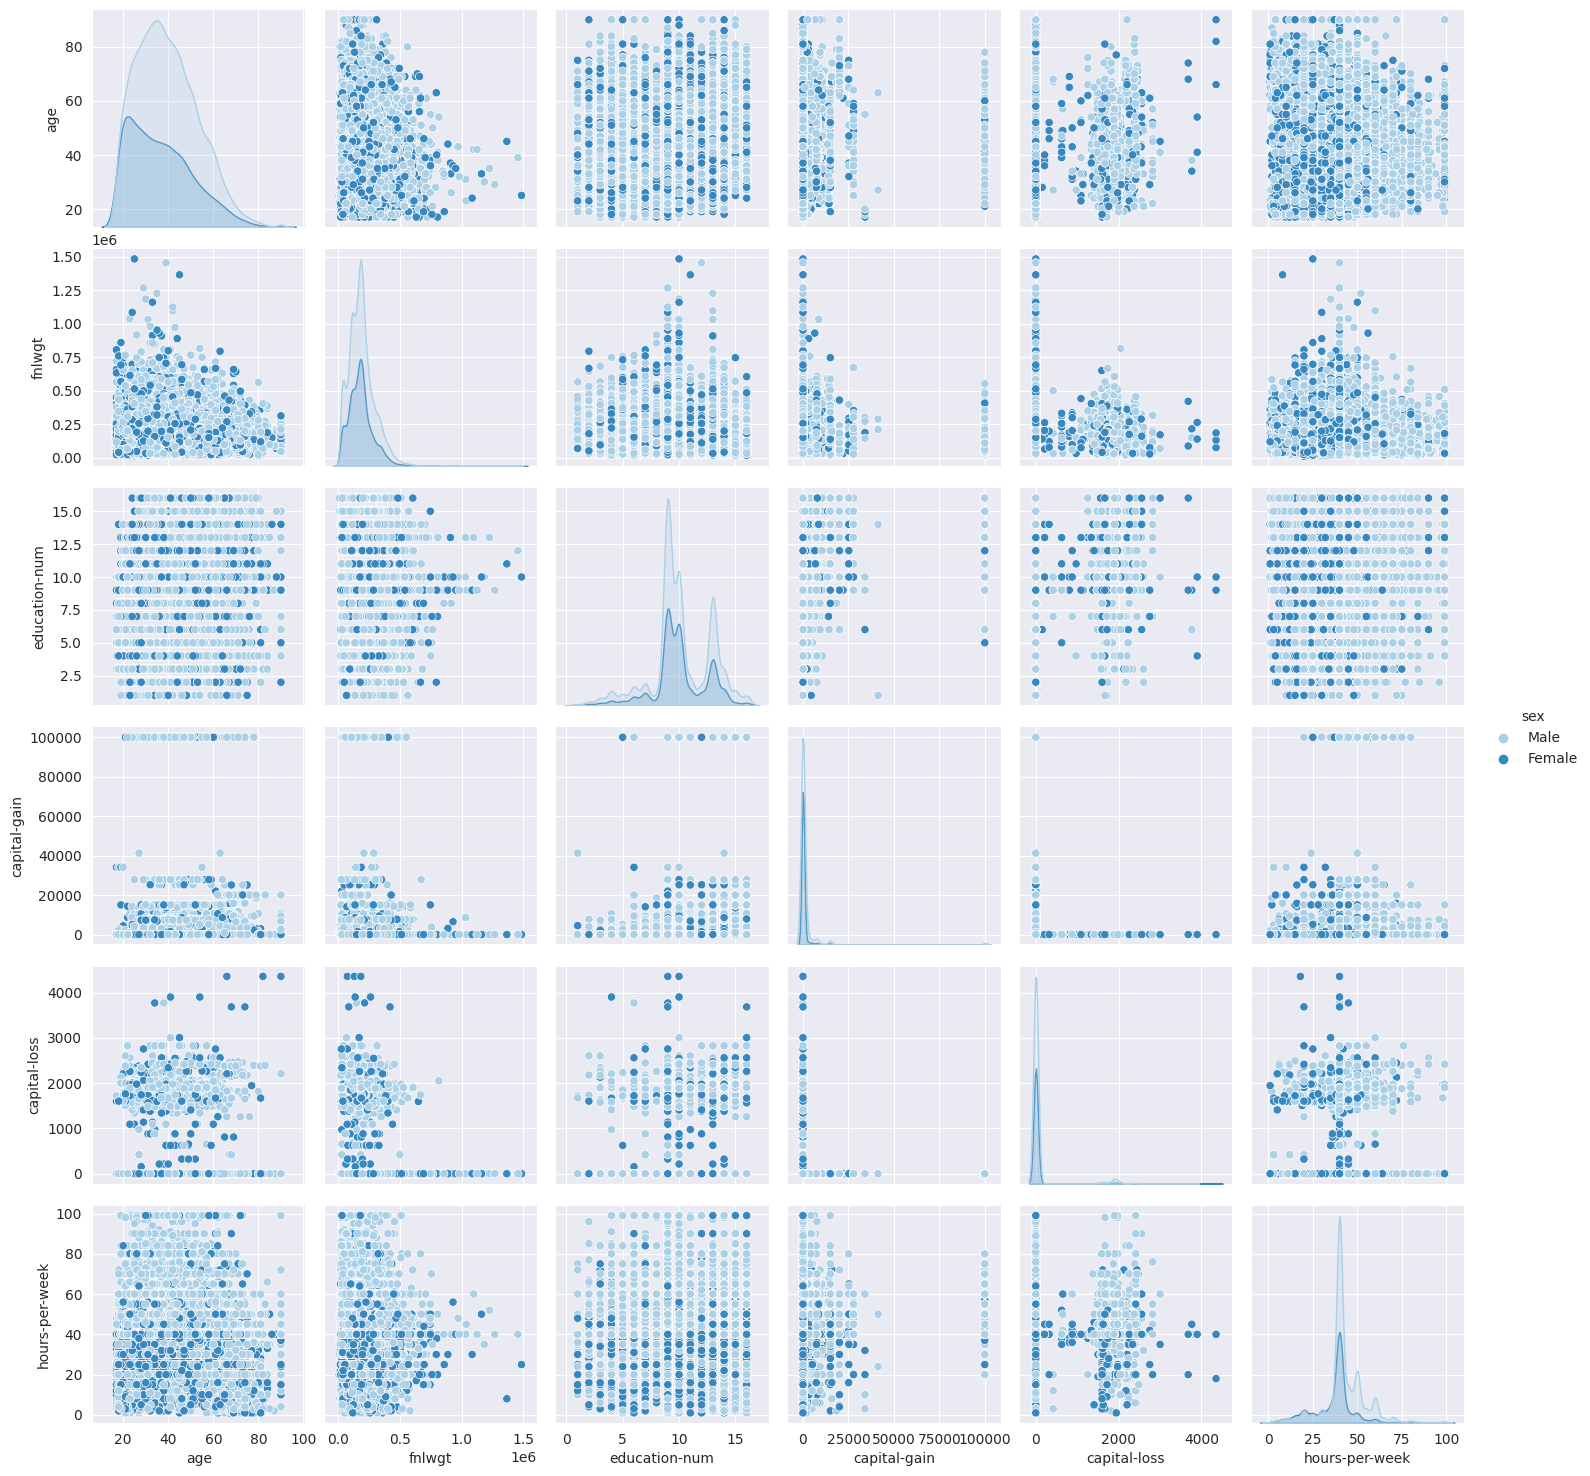

In [ ]:
sb.pairplot(demo, hue='sex',palette='Blues')